In [1]:
from deep_mri.dataset import dataset_factory, CLASS_NAMES
from deep_mri.model_zoo import model_factory

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
model = model_factory('3d_martin', **{"input_shape" : (97, 115, 97, 1),
                                      "conv_layers": 2,
                                      "conv_kernel" : 3,
                                      "init_filters" : 128})
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 49, 58, 49, 128)   3584      
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 25, 29, 25, 256)   884992    
_________________________________________________________________
flatten (Flatten)            (None, 4640000)           0         
_________________________________________________________________
dense (Dense)                (None, 400)               1856000400
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1203      
Total params: 1,856,890,179
Trainable params: 1,856,890,179
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_ds, valid_ds = dataset_factory("3d", True, True, '/home/karelto1/MRI/minc_beast/*/*/*.nii', **{
    "normalize" : True,
    "downscale_ratio" : 2
  })

In [ ]:
import numpy as np
np.sum([False, False, True])
img, label = next(iter(train_ds))

In [ ]:
img, label = next(iter(train_ds))
label

In [ ]:
pd.read_csv( '/home/karelto1/ADNI1_Complete_1Yr_1.5T_10_13_2019.csv')

In [ ]:
%ls /home/karelto1/MRI/minc_beast/ad/_image_id_101549/ADNI_027_S_1385_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080408153436647_S47223_I101549_normalized_masked.nii

In [ ]:
batch_size=1
epochs=100
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['AUC', 'accuracy'])

model.fit(train_ds.batch(batch_size),
          epochs=epochs,
          validation_data=valid_ds.batch(batch_size),
          verbose=1,
          workers=40,
          use_multiprocessing=True
          )

In [ ]:
label

In [ ]:
def _get_image_group(file_path, class_folder=-3):
    parts = file_path.split(os.path.sep)
    return parts[class_folder] == CLASS_NAMES

In [ ]:
_get_image_group('/home/karelto1/MRI/minc_beast/ad/_image_id_101549/ADNI_027_S_1385_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080408153436647_S47223_I101549_normalized_masked.nii')

In [ ]:
['', 'home', 'karelto1', 'MRI', 'minc_beast', 'mci', '_image_id_130241', 'ADNI_068_S_0442_MR_MPR-R____N3__Scaled_2_Br_20081212150437526_S14128_I130241_normalized_masked.nii'][-3]

In [ ]:
%pip install fslpy

In [1]:
from fsl.data.image import Image
from fsl.utils.image.resample import resample
from nilearn.plotting import plot_anat
from deep_mri.dataset import numpy_to_nibabel

In [ ]:
img_path = '/home/karelto1/MRI/minc_beast/ad/_image_id_101549/ADNI_027_S_1385_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080408153436647_S47223_I101549_normalized_masked.nii'
img = Image(img_path)
plot_anat(numpy_to_nibabel(img.data))

In [ ]:
res_img = resample(img, newShape=(96, 96, 96),order=3)
plot_anat(numpy_to_nibabel(res_img[0]))

In [3]:
from glob import glob
import os
def create_dir_if_not_exists(path):
    if not os.path.exists(path):
        os.makedirs(path)


In [ ]:


create_dir_if_not_exists(new_dir)
create_dir_if_not_exists(os.path.join(new_dir, 'ad'))
create_dir_if_not_exists(os.path.join(new_dir, 'mci'))
create_dir_if_not_exists(os.path.join(new_dir, 'cn'))
pbar = tqdm(total=len(files))
for img_path in files:
    group_dir = img_path.split(os.path.sep)[-3]
    img_dir = img_path.split(os.path.sep)[-2]
    img_name = img_path.split(os.path.sep)[-1]
    img_root = os.path.join(new_dir, group_dir, img_dir)
    create_dir_if_not_exists(img_root)
    img = Image(img_path)
    res_img = resample(img, newShape=new_shape,order=3)
    Image(res_img[0]).save(os.path.join(img_root, img_name))
    pbar.update(1)

In [ ]:
from auto_tqdm import tqdm

In [1]:
new_dir


NameError: name 'new_dir' is not defined

In [5]:
img = nib.load(files[0])

NameError: name 'files' is not defined

In [ ]:
plot_anat(img)

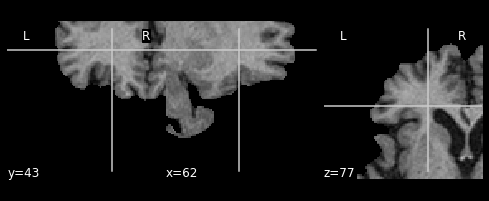

In [10]:
boxes = _get_3d_boxes(img.get_fdata(), 10, box_size=96, include_zeros=False)


plot_anat(numpy_to_nibabel(boxes[-1]))

In [7]:
from glob import glob
from auto_tqdm import tqdm
import os
import nibabel as nib
from deep_mri.dataset.dataset_encoder import _get_3d_boxes



files = glob("/home/karelto1/MRI/minc_beast/*/*/*.nii")
new_dir = "/home/karelto1/MRI/96_96_96_crop_64"
box_shape = 96
slices = 64


create_dir_if_not_exists(new_dir)
create_dir_if_not_exists(os.path.join(new_dir, 'ad'))
create_dir_if_not_exists(os.path.join(new_dir, 'mci'))
create_dir_if_not_exists(os.path.join(new_dir, 'cn'))
pbar = tqdm(total=len(files)*slices)
for img_path in files:
    group_dir = img_path.split(os.path.sep)[-3]
    img_dir = img_path.split(os.path.sep)[-2]
    img_name = img_path.split(os.path.sep)[-1].split('.')[0]
    img_root = os.path.join(new_dir, group_dir, img_dir)
    create_dir_if_not_exists(img_root)
    img = nib.load(img_path)
    boxes = _get_3d_boxes(img.get_fdata(), slices, box_size=box_shape, include_zeros=False)
    for box_id in range(len(boxes)):
        n_img = numpy_to_nibabel(boxes[box_id])
        n_img.to_filename(os.path.join(img_root, f"{img_name}_{box_id}.nii"))
        pbar.update(1)